In [17]:
import pandas as pd 
import numpy as np


import scipy.cluster.hierarchy as sch


import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df  = pd.read_csv('symbols-correlation.csv', index_col = 'Symbol')
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Symbol,,,,,,,,,,,,,,,,,,,,,
A,0,50,24,88,72,48,52,88,100,76,...,62,74,46,68,70,24,70,76,60,78
AAL,50,0,42,60,56,26,18,36,40,48,...,56,76,2,76,60,-6,38,32,74,38
AAP,24,42,0,46,62,12,16,20,36,22,...,36,48,28,70,60,8,24,22,48,22
AAPL,88,60,46,0,48,8,40,68,82,54,...,74,80,14,78,68,34,60,72,50,58
ABBV,72,56,62,48,0,50,84,78,94,54,...,26,58,48,62,56,16,58,44,68,56


In [48]:
def _clustering_pass(sub, is_corr , max_cluster = 0.4):
    df = sub.copy()
    
    if is_corr: 
        X = df.values
    else:
        X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.ward(d)
    #ind = sch.fcluster(L, t = max_cluster, criterion ='maxclust')
    
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, max_cluster * d.max(), 'distance')

    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df = df.reindex(columns, axis='columns')
    if is_corr: df = df.reindex(columns, axis='index')
    
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))

    return (ind, counts, df)


In [47]:
index, counts ,df_ = _clustering_pass(df, is_corr=True , max_cluster = 10)
df_['Cluster'] = index
df_.to_csv('symbols-correlation-clusters.csv')
counts

721.6932589403895


{1: 160, 2: 49, 3: 72, 4: 47, 5: 38, 6: 59, 7: 12, 8: 1, 9: 30, 10: 25}

In [49]:
df_.head()

,ITW,NVDA,NUE,DOV,NTRS,NTAP,NSC,DXC,NCLH,MXIM,...,ES,CMS,AMT,WELL,WEC,SO,CME,LW,CBOE,Cluster
Symbol,,,,,,,,,,,,,,,,,,,,,
ITW,0,112,98,128,108,106,104,100,126,108,...,-22,-44,-30,-22,-32,-40,-6,-10,-22,3
NVDA,112,0,94,104,68,92,68,80,100,114,...,-26,-40,-10,-34,-28,-40,-38,8,-30,1
NUE,98,94,0,116,106,80,100,90,84,84,...,-24,-44,-62,-36,-38,-46,-16,14,-38,2
DOV,128,104,116,0,108,84,96,76,90,116,...,-10,-28,-30,-22,-26,-20,2,14,-30,1
NTRS,108,68,106,108,0,76,88,62,82,70,...,-24,-30,-58,-46,-40,-30,0,-4,-24,4


In [50]:
df_serie = pd.read_csv('stocks/total_data_price_Symbol.csv', index_col='Symbol')
df_serie.head()

,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-19,2019-02-20,2019-02-21,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
Symbol,,,,,,,,,,,,,,,,,,,,,
A,75.145678,74.977549,74.905022,75.478650,75.956675,76.266566,76.672066,76.761075,77.268776,77.133611,...,83.646706,83.553805,83.573713,83.985128,84.592298,84.854411,84.940674,84.993759,84.920527,84.933851
AAL,36.135525,35.829624,35.773708,35.635560,35.704636,35.546753,35.316507,35.073104,34.727735,34.704711,...,27.790633,27.963329,28.172555,28.424956,28.856693,29.065921,29.275147,28.989536,28.697282,28.368497
AAP,159.906713,160.222005,162.847234,164.427007,165.771154,166.969269,167.666239,167.891917,166.982544,164.101756,...,155.066177,156.003169,157.013077,157.079549,157.744339,159.103836,159.486094,158.947617,158.465642,158.761475
AAPL,169.694194,168.701197,167.367009,167.590144,167.514664,167.964223,167.810003,168.056107,168.459712,168.669718,...,277.063985,278.586243,278.639313,278.317607,279.730418,281.139913,284.612254,286.535797,288.940236,290.180583
ABBV,72.803335,72.797213,73.008336,73.240878,73.583570,73.813049,74.094543,74.011930,73.849765,73.207219,...,86.636609,87.119456,86.905579,86.649572,86.947703,87.297684,87.472677,87.132416,86.701421,86.283389


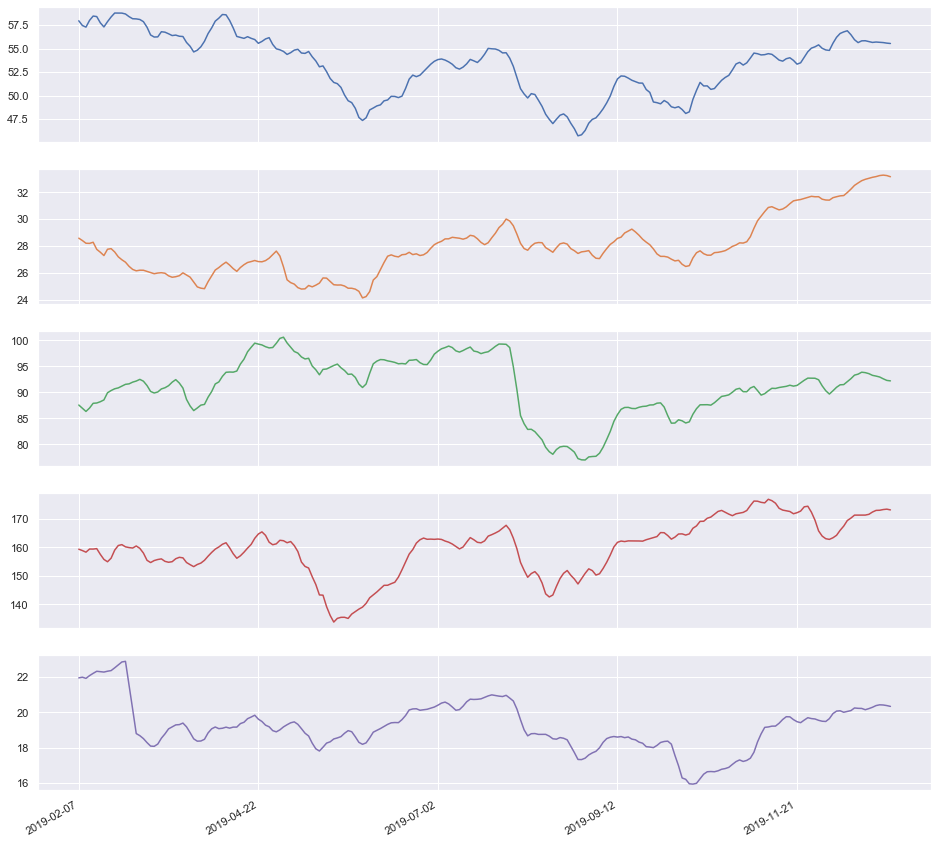

In [51]:
cls_n = 2
cluster_list =  df_[df_['Cluster'] == cls_n].index

sns.set(rc={'figure.figsize':(16, 16)})
cluster_Symbol = pd.DataFrame()
for s in cluster_list[:5]: 
    cluster_Symbol[s] = df_serie.loc[s]
    
cluster_Symbol.head()

cluster_Symbol.plot(subplots=True, legend=False)
plt.show()

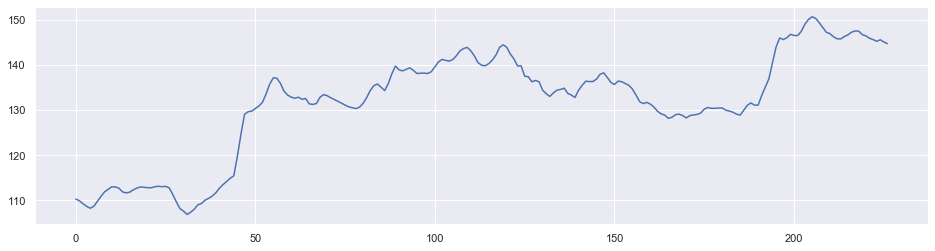

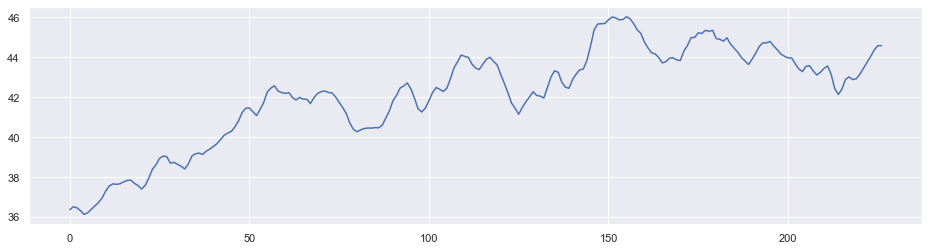

In [52]:
sns.set(rc={'figure.figsize':(16, 4)})

plt.plot(list(range(227)) , df_serie.loc['DIS'] )
plt.show()

plt.plot(list(range(227)) , df_serie.loc['CMCSA'] )
plt.show()

